In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from math import sqrt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (18, 6)
mpl.rcParams['axes.grid'] = False

In [2]:
#locally weighted regression
def lwr(inp, out, k):
    m,n = np.shape(inp)
    ypred = np.zeros(m)    
    for i in range(m):
        ypred[i] = inp[i] * beta(inp[i], inp, out, k)
    #print("The final prediction is :",ypred)
    return ypred

def lwr1(x0, inp, out, k):
    m,n = np.shape(inp)
    ypred = np.zeros(m)    
    ypred = x0 * beta(x0, inp, out, k)
    #print("The final prediction is :",ypred)
    return ypred

def beta(point, inp, out, k):
    wt = kernal(point, inp, k)
    #print("The weight of betas is",wt)
    beta_val = (inp.T * (wt*inp)).I * (inp.T * wt * out)
    #print("The weight is beta value is",beta_val)
    return beta_val

def kernal(point, inp, k):
    l,b = np.shape(inp)
    weights = np.mat(np.eye((l)))
    #print(weights)    
    for i in range(l):
        diff = point - inp[i]
        weights[i,i] = np.exp(np.dot(diff,diff.T) / (-2.0 * (k**2)))
    return weights

In [3]:
#dataset preparation with lag
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [89]:
data = pd.read_csv('/home/kishora/Documents/Datasets/allYearHarangi.csv', header=0, index_col=0)
dataset=data.drop(columns = ['Present Storage(TMC)', 'Reservoir Level(TMC)', 'Outflow'])
values = dataset.values
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 4, 3)#lag of 4 days
# drop columns we don't want to predict
reframed.drop(reframed.columns[[-1,-2,-3]], axis=1, inplace=True)
# reframed.drop(reframed.columns[[-2,-3]], axis=1, inplace=True)
reframed.head()

,var1(t-4),var2(t-4),var3(t-4),var4(t-4),var1(t-3),var2(t-3),var3(t-3),var4(t-3),var1(t-2),var2(t-2),...,var4(t-1),var1(t),var2(t),var3(t),var4(t),var1(t+1),var2(t+1),var3(t+1),var4(t+1),var1(t+2)
4,0.001823,0.0,0.0,0.0,0.003068,0.0,0.0,0.0,0.002131,0.0,...,0.0,0.001669,0.0,0.0,0.0,0.002144,0.0,0.0,0.0,0.001913
5,0.003068,0.0,0.0,0.0,0.002131,0.0,0.0,0.0,0.001515,0.0,...,0.0,0.002144,0.0,0.0,0.0,0.001913,0.0,0.0,0.0,0.001682
6,0.002131,0.0,0.0,0.0,0.001515,0.0,0.0,0.0,0.001669,0.0,...,0.0,0.001913,0.0,0.0,0.0,0.001682,0.0,0.0,0.0,0.001438
7,0.001515,0.0,0.0,0.0,0.001669,0.0,0.0,0.0,0.002144,0.0,...,0.0,0.001682,0.0,0.0,0.0,0.001438,0.0,0.0,0.0,0.002054
8,0.001669,0.0,0.0,0.0,0.002144,0.0,0.0,0.0,0.001913,0.0,...,0.0,0.001438,0.0,0.0,0.0,0.002054,0.0,0.0,0.0,0.002208


In [90]:
reframed.drop(reframed.columns[[-2,-3,-4,-5,-6,-7,-8,-9]], axis=1, inplace=True)
reframed.head()


,var1(t-4),var2(t-4),var3(t-4),var4(t-4),var1(t-3),var2(t-3),var3(t-3),var4(t-3),var1(t-2),var2(t-2),var3(t-2),var4(t-2),var1(t-1),var2(t-1),var3(t-1),var4(t-1),var1(t+2)
4,0.001823,0.0,0.0,0.0,0.003068,0.0,0.0,0.0,0.002131,0.0,0.0,0.0,0.001515,0.0,0.0,0.0,0.001913
5,0.003068,0.0,0.0,0.0,0.002131,0.0,0.0,0.0,0.001515,0.0,0.0,0.0,0.001669,0.0,0.0,0.0,0.001682
6,0.002131,0.0,0.0,0.0,0.001515,0.0,0.0,0.0,0.001669,0.0,0.0,0.0,0.002144,0.0,0.0,0.0,0.001438
7,0.001515,0.0,0.0,0.0,0.001669,0.0,0.0,0.0,0.002144,0.0,0.0,0.0,0.001913,0.0,0.0,0.0,0.002054
8,0.001669,0.0,0.0,0.0,0.002144,0.0,0.0,0.0,0.001913,0.0,0.0,0.0,0.001682,0.0,0.0,0.0,0.002208


In [91]:
#train test split
values = reframed.values
n_hours = 4
n_features = 4
n_train_days = (365 * 1)
train = values[:n_train_days, :]
test = values[n_train_days:, :]
n_obs = n_hours * n_features
train_X, train_y = train[:, :n_obs], train[:, -1]
test_X, test_y = test[:, :n_obs], test[:, -1]
print(train_X.shape, len(train_X), train_y.shape)
train_y = train_y.reshape((train_y.shape[0],1))
# test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))
# print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(365, 16) 365 (365,)


In [92]:
test_X.shape

(2551, 16)

In [93]:
import timeit
start = timeit.default_timer()
ypred=[]
# get normalized inflow for each test input 
for i in test_X:
    ypred.append(lwr1(i, train_X, train_y, 6))
ypred = np.array(ypred).reshape(test_y.shape[0],1)
stop = timeit.default_timer()
print('Time: ', stop - start)  

Time:  20.035395555998548


In [94]:
test_y=test_y.reshape(test_y.shape[0],1)

In [95]:
# inverse the normalized values to actual
inv_yhat = np.concatenate((ypred, test_X[:, -3:]), axis=1)
out=scaler.inverse_transform(inv_yhat) 
out=out[:,0]
tar_y = np.concatenate((test_y, test_X[:, -3:]), axis=1)
tar=scaler.inverse_transform(tar_y)
tar=tar[:,0]

In [96]:
print("MSE = ",metrics.mean_squared_error(tar,out))
print("RMSE = ",sqrt(metrics.mean_squared_error(tar,out)))

MSE =  4614051.039448928
RMSE =  2148.034226787117


In [97]:
tar[:-3]

array([135.24675, 134.4026 , 133.55844, ...,  98.     , 103.     ,
        98.     ], dtype=float32)

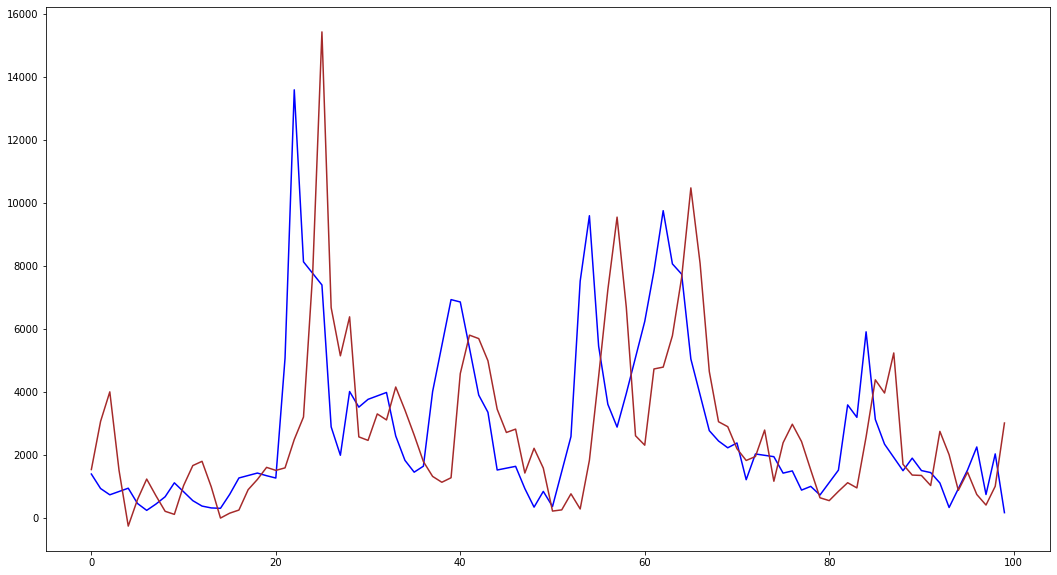

In [40]:
mpl.rcParams['figure.figsize'] = (18, 10)
mpl.rcParams['axes.grid'] = False
pt.plot(tar[2000:2100],c='blue')
pt.plot(out[2000:2100],c='brown')

In [ ]:
# for e in range(epoch):
#     rand = np.zeros((2919,4))
#     for i in range(3):
#         rand+= i[:,i].dot(w[i])
#     out = rand.reshape(2919,4,1)+bias

In [76]:
type(out)

numpy.ndarray

In [43]:
outform = pd.DataFrame()
outform['tar']=tar
outform['out']=out
outform['shift']=outform.out.shift(-2)

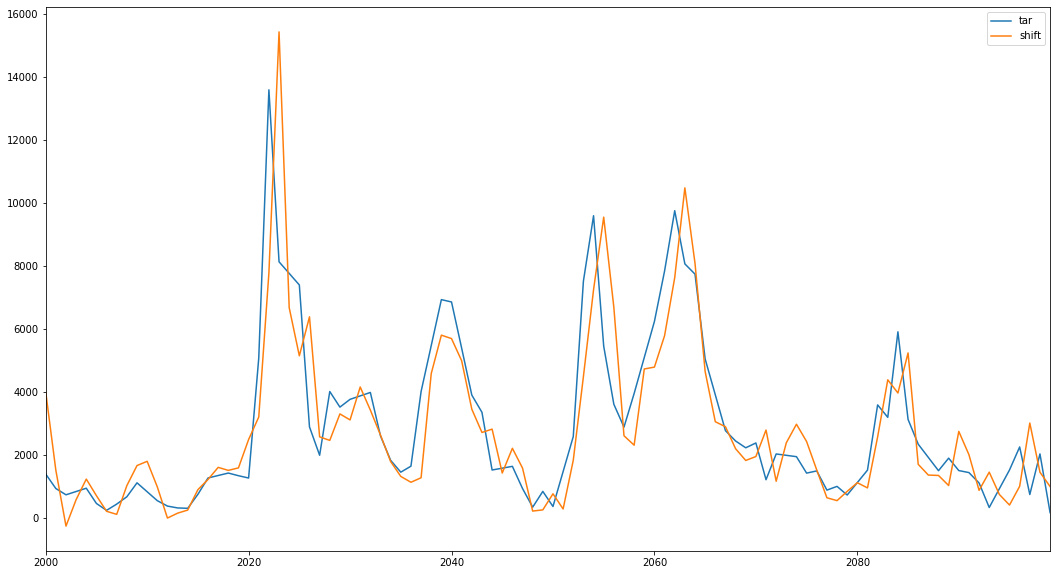

In [47]:
outform.iloc[2000:2100,[0,2]].plot()

In [46]:
# outform.out.shift(-3)
print(sqrt(metrics.mean_squared_error(np.array(outform.iloc[2:,0]),np.array(outform.iloc[:-2,2]))))

2167.465563350276


In [44]:
outform.iloc[:,2]

0       274.930156
1       273.118359
2       271.306570
3       269.494772
4       267.682984
           ...    
2547     72.410966
2548     75.383373
2549     72.023944
2550           NaN
2551           NaN
Name: shift, Length: 2552, dtype: float64

In [48]:
# the shifted RMSE for outcome t+2
sqrt(metrics.mean_squared_error(tar[:-3],out[3:]))

899.4981904742866

In [50]:
metrik = {6:{}}
outval=[]

In [98]:

def doityourself(n_hours,k,tau):
    reframed = series_to_supervised(scaled, n_hours, 3)#lag of 4 days
# drop columns we don't want to predict
    reframed.drop(reframed.columns[[-1,-2,-3]], axis=1, inplace=True)
    reframed.drop(reframed.columns[[-2,-3,-4,-5,-6,-7,-8,-9]], axis=1, inplace=True)
    #train test split
    values = reframed.values
#     n_hours = 3
    n_features = 4
    n_train_days = (365 * k)
    train = values[:n_train_days, :]
    test = values[n_train_days:, :]
    n_obs = n_hours * n_features
    train_X, train_y = train[:, :n_obs], train[:, -1]
    test_X, test_y = test[:, :n_obs], test[:, -1]
#     print(train_X.shape, len(train_X), train_y.shape)
    train_y = train_y.reshape((train_y.shape[0],1))
#     start = timeit.default_timer()
    ypred=[]
# get normalized inflow for each test input 
    for i in test_X:
        ypred.append(lwr1(i, train_X, train_y, tau))
    ypred = np.array(ypred).reshape(test_y.shape[0],1)
#     stop = timeit.default_timer()
#     print('Time: ', stop - start)
    test_y=test_y.reshape(test_y.shape[0],1)
    # inverse the normalized values to actual
    inv_yhat = np.concatenate((ypred, test_X[:, -3:]), axis=1)
    out=scaler.inverse_transform(inv_yhat) 
    out=out[:,0]
    tar_y = np.concatenate((test_y, test_X[:, -3:]), axis=1)
    tar=scaler.inverse_transform(tar_y)
    tar=tar[:,0]
    outform = pd.DataFrame()
    outform['tar']=tar[:-3]
    outform['out']=out[3:]
    index = pd.date_range('2012-01-07', '2018-12-28')
    outform=outform.set_index(index)
#     outform['shift']=outform.out.shift(-3)
    outform.to_csv('/home/kishora/Documents/testResult/bestLWR_lag_4_d1')
#     print("RMSE = ",sqrt(metrics.mean_squared_error(tar,out)))
    outval.append([sqrt(metrics.mean_squared_error(tar,out)),sqrt(metrics.mean_squared_error(tar[:-3],out[3:]))])
#     print("nRMSE = ",sqrt(metrics.mean_squared_error(tar[:-3],out[3:])))


In [99]:
doityourself(4,1,7)

In [64]:
metrik

{3: [3285.4487277642106, 1241.0029834907023]}

In [52]:
for i in range(2,7):
    doityourself(i,2,7)

In [137]:
#lwr testing
from pprint import pprint
pprint(metrik) #using all year as dataset
# {lag :{#ofyear :[actual RMSE , shifted(-3) RMSE]}}

{3: {1: [2166.619722299739, 899.4981904742866],
     2: [2255.2504730270257, 997.9977289652948],
     3: [2347.7018360342945, 1238.1867173821986]},
 4: {1: [2148.034226787117, 959.4772327353237],
     2: [2257.2201655723943, 993.1623134776684],
     3: [2352.7661530161326, 1330.8712167857436]},
 5: {1: [2187.1217275440026, 986.093985951418],
     2: [2254.9343929185907, 1023.0006588686455],
     3: [2363.577136907629, 1359.3848052109108]}}


In [151]:
pprint(metrik)

{6: {1: [2255.0336154452343, 1046.1554392661312],
     2: [2281.266573042194, 1068.899545776513],
     3: [2368.013118253344, 1362.6744867867253]}}


In [131]:
metrik1=metrik
pprint(metrik1) #using june-to-october dataset

{3: {1: [3285.4487277642106, 1241.0029834907023],
     2: [3446.191070457396, 1477.36101243679],
     3: [3587.3828623012155, 2121.8737743813426]},
 4: {1: [3276.0287714678147, 1404.4566002263878],
     2: [3454.9095602002026, 1485.1093828373876],
     3: [3597.6095072894304, 2261.827085346494]},
 5: {1: [3355.5051790853986, 1485.854808943265],
     2: [3462.624669857044, 1545.2681335413456],
     3: [3624.089825420596, 2312.2261914671108]}}


In [150]:
outform.to_csv('/home/kishora/Documents/Datasets/lwrtestLag3_plus3_year1.csv')

In [53]:
m = np.arange(1,11)
m.shape

(10,)

In [11]:
outval

[[2264.115404367055, 1023.8027132458072],
 [2255.379156505499, 997.706431269648],
 [2257.353605151053, 992.9656956014641],
 [2255.1707387966744, 1022.7462645496058],
 [2281.457126188478, 1068.7686936273649]]

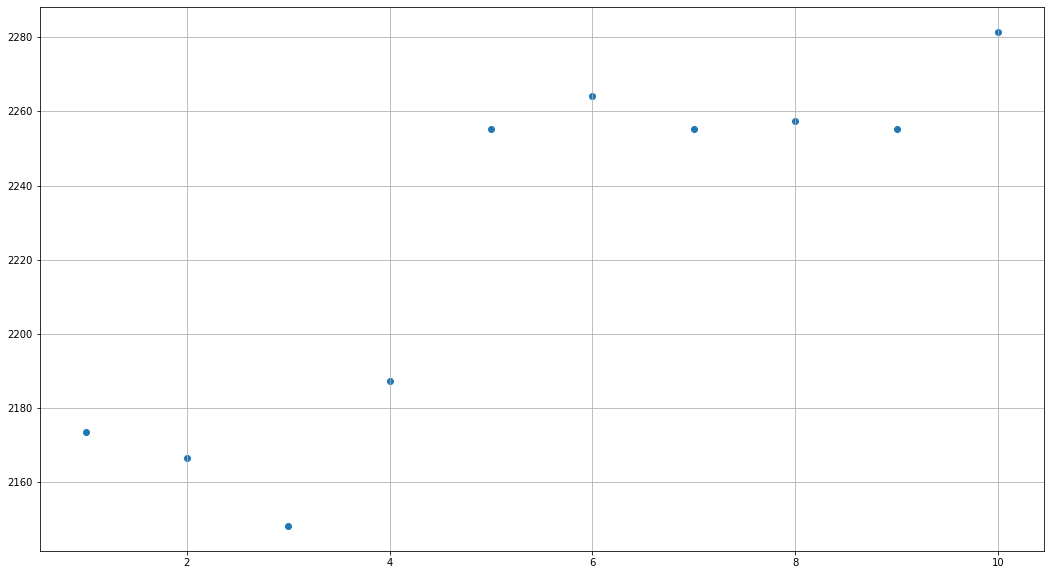

In [54]:
X = np.array(outval)
mpl.rcParams['axes.grid'] = True
pt.scatter(x=m,y=X[:,0])

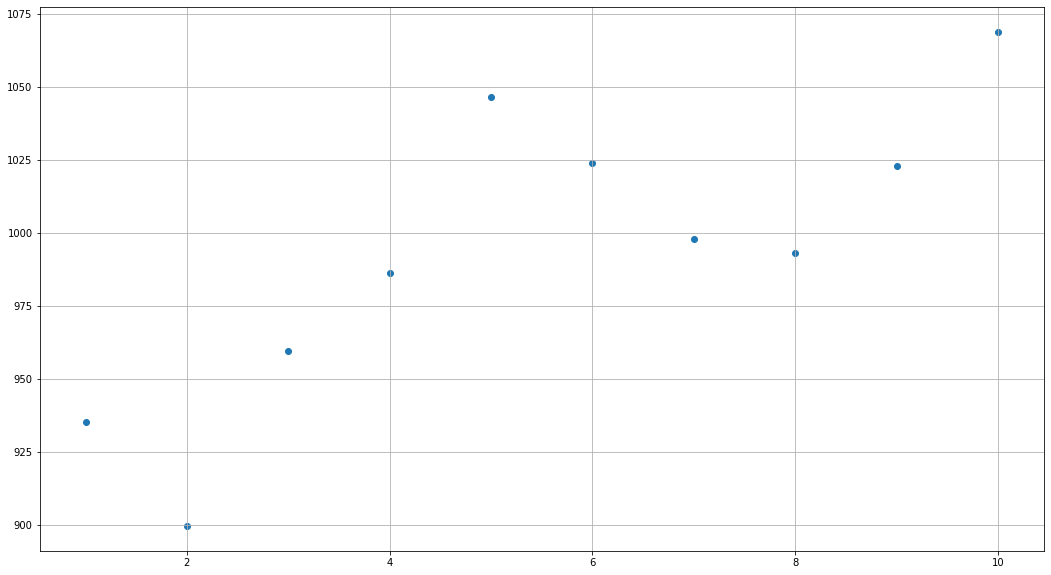

In [55]:
pt.scatter(x=m,y=X[:,1])

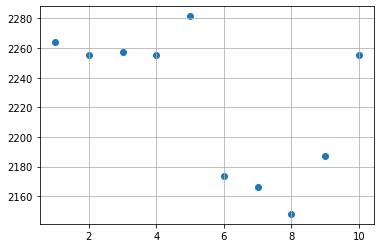

In [22]:
X = np.array(outval)
pt.scatter(x=m,y=X[:,0])

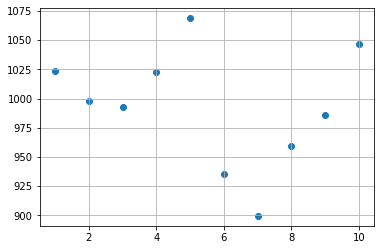

In [23]:
pt.scatter(x=m,y=X[:,1])

In [84]:
data.loc['2012-01-06': '2018-12-31'].shape

(2552, 7)

In [88]:
tar[:-3].shape

(2549,)